<a href="https://colab.research.google.com/github/Viroslav/DLS/blob/main/ML-kaggle/%22Catboost%2Blogreg%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Осень 2022</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/Viroslav/DLS/main/ML-kaggle/train.csv')

In [4]:
data.tail()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0
5281,19,75.90,1375.6,Female,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,0


In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [6]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [8]:
import seaborn as sns
sns.set_theme()

In [9]:
data.TotalSpent.value_counts()

           9
20.2       9
19.75      8
20.05      6
19.65      6
          ..
41.85      1
4326.25    1
950.2      1
4264       1
1375.6     1
Name: TotalSpent, Length: 4978, dtype: int64

Видим отсутсвие значение ' ' с количеством 9, заменим на медианное значение по серии

In [10]:
empty = data[['TotalSpent']].query('TotalSpent == " "').index  # находим индекс этих строк

for i in empty:                                                # заменяем их на np.nan
  data.loc[i, 'TotalSpent'] = np.nan    

data[['TotalSpent']] = data[['TotalSpent']].astype(float)      # приводим весь столбец к типу float

data.TotalSpent.isna().sum()                                   # теперь видим нули, заменим их на среднее значение

9

In [11]:
data['TotalSpent'].fillna(np.mean(data.TotalSpent), inplace = True)
data['TotalSpent'].isna().sum()

0

<Figure size 720x576 with 0 Axes>

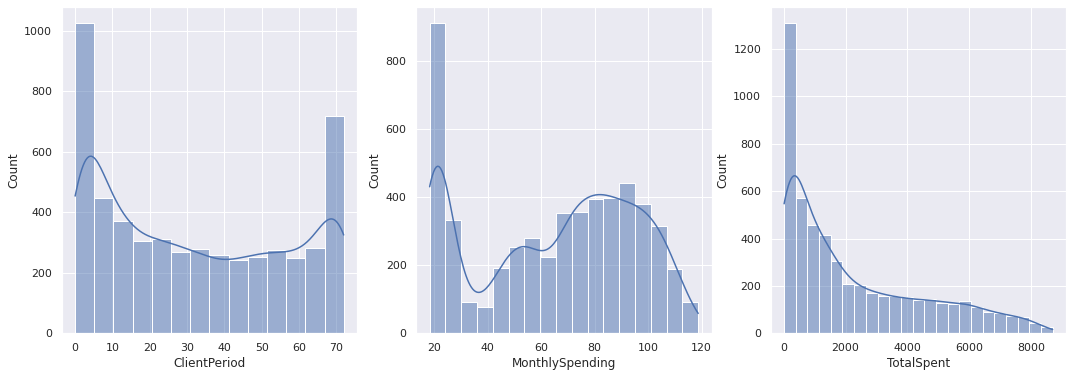

In [12]:
# отобразим 3 гистограммы для численных признаков

plt.figure(figsize=(10,8))
fig, axes = plt.subplots(1, 3, figsize=(18,6))

sns.histplot(data=data[num_cols[0]], ax=axes[0], kde = True)
sns.histplot(data=data[num_cols[1]], ax=axes[1], kde = True)
sns.histplot(data=data[num_cols[2]], ax=axes[2], kde = True)

In [13]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 20   # зададим размер текста

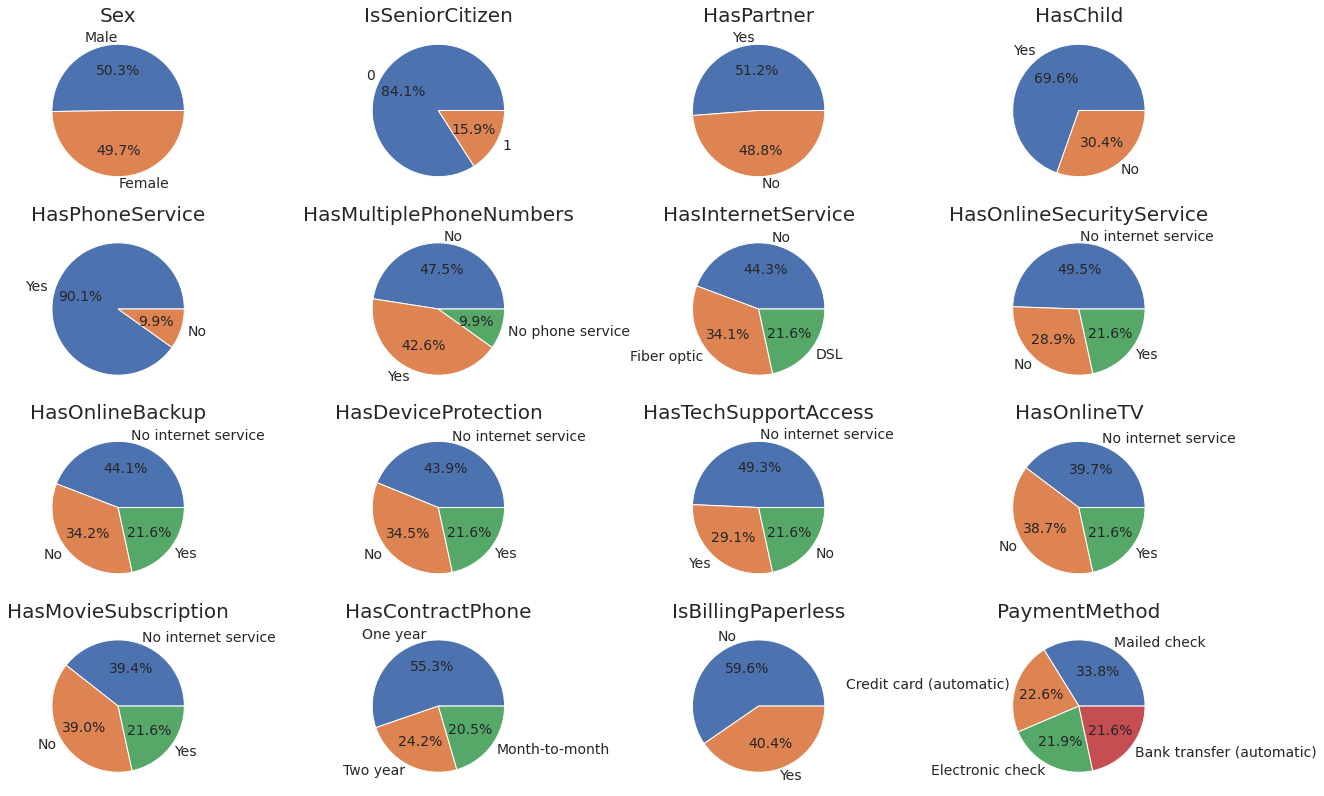

In [14]:
fig, axes = plt.subplots(4, 4, figsize=(22,14))   # создадим subplots 4 на 4
k, f = -1, 0
for j, i in enumerate(cat_cols):   # в цикле строим pie для каждой колонки из data категориальной переменной
  if j % 4 == 0:
    k += 1
    f = 0
  ax1 = plt.subplot2grid((4,4), (k, f))
  plt.pie(data[i].value_counts(), labels = data[i].unique(), autopct='%1.1f%%', textprops={'fontsize': 14}); 
  plt.title(i, fontsize = 20);
  f+=1

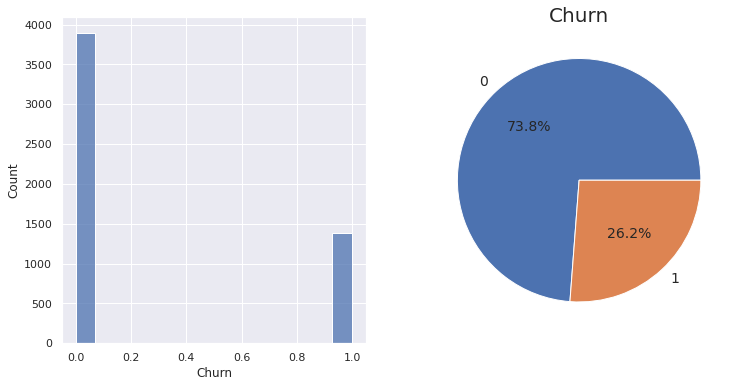

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
plt.pie(data['Churn'].value_counts(), labels = data['Churn'].unique(), autopct='%1.1f%%', textprops={'fontsize': 14}); 
plt.title('Churn', fontsize = 20);
sns.histplot(data=data['Churn'], ax=axes[0]);

Как можно видеть, распределение классов неравномерно (примерно 3:1).
 Классы несбалансированны, следовательно метрикой accuracy пользоваться несообразно для предсказания оттока. Будем пользоваться roc кривой и метрикой roc_auc_score

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

Каких-то сильных выбросов не видно, все распределения количественных переменных ненормальны

Попробуем взять логарифм от количественных переменных для нормализации распределения

In [16]:
data = data.assign(log_Total_spent=np.log(data.TotalSpent + 1))
data = data.assign(log_Monthly_spending=np.log(data.MonthlySpending + 1))
data = data.assign(log_Client_Period=np.log(data.ClientPeriod + 1))

In [17]:
num_cols.append('log_Monthly_spending')
num_cols.append('log_Total_spent')
num_cols.append('log_Client_Period')

In [18]:
num_cols

['ClientPeriod',
 'MonthlySpending',
 'TotalSpent',
 'log_Monthly_spending',
 'log_Total_spent',
 'log_Client_Period']

<Figure size 864x432 with 0 Axes>

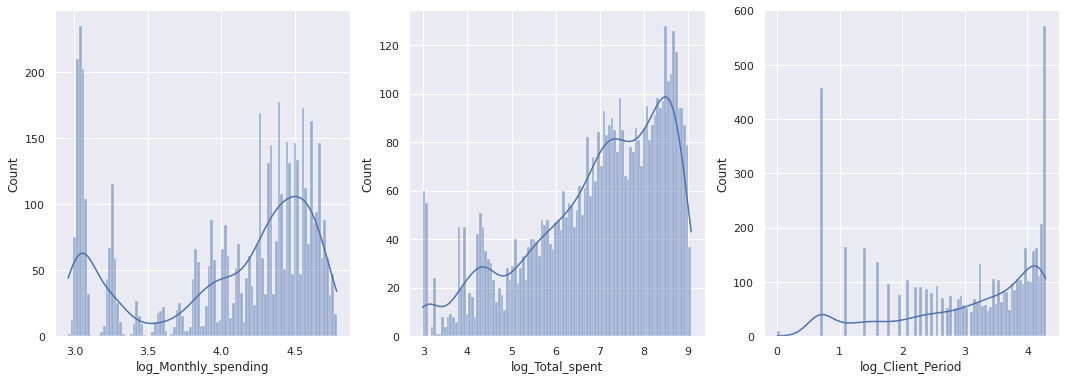

In [19]:
plt.figure(figsize=(12,6))
fig, axes = plt.subplots(1, 3, figsize=(18,6));

sns.histplot(data.log_Monthly_spending, bins=100, ax = axes[0], kde = True);
sns.histplot(data.log_Total_spent, bins=100, ax = axes[1], kde = True);
sns.histplot(data.log_Client_Period, bins=100, ax = axes[2], kde = True);

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [20]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

Отделим целевую перенную в y, признаки в X

In [21]:
scaler_train = StandardScaler()
scaler_valid = StandardScaler()
X, y = data.drop(columns = ['Churn']), data.Churn

One-hot-encoding с помощью функции get_dummies

In [22]:
cat_feat = pd.get_dummies(X[cat_cols])

In [23]:
cat_feat.head()

,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,1
1,0,0,1,0,1,1,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
2,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
3,1,1,0,0,1,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
4,0,1,0,0,1,0,1,0,1,0,...,1,0,0,1,1,0,0,1,0,0


Соединим в итоговый DataFrame из всех признаков в виде чисел

In [24]:
X = pd.concat([X[num_cols], cat_feat], axis=1)
X.head()  # имеем 48 признаков

,ClientPeriod,MonthlySpending,TotalSpent,log_Monthly_spending,log_Total_spent,log_Client_Period,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,3.020425,6.934738,4.025352,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,3.290266,7.535403,4.290459,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.90,4.342506,4.342506,0.693147,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570.00,4.385770,7.852050,3.496508,1,1,0,0,...,0,1,0,0,1,0,0,0,0,1
4,60,115.25,6758.45,4.755743,8.818697,4.110874,0,1,0,0,...,1,0,0,1,1,0,0,1,0,0


Проведём деление на test и train, а потом осуществим нормализацию

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.33, random_state = 17)
X_train_scaled = scaler_train.fit_transform(X_train)
X_val_scaled = scaler_valid.fit_transform(X_val)

In [26]:
%%time
clf = LogisticRegressionCV(Cs = [100, 10, 1, 0.1, 0.01, 0.001], cv=5, random_state=17, scoring = 'roc_auc', refit=True, max_iter = 180)
clf.fit(X_train_scaled, y_train)
clf.score(X_val_scaled, y_val)

CPU times: user 1.11 s, sys: 687 ms, total: 1.8 s
Wall time: 928 ms


0.8426284757554109

In [27]:
clf.coef_

array([[-0.18383536,  0.09995363, -0.08888944,  0.080861  , -0.2655253 ,
        -0.29945841,  0.09162006,  0.00844971, -0.00844971,  0.02205154,
        -0.02205154,  0.00836171, -0.00836171,  0.0083329 , -0.0083329 ,
        -0.09791124,  0.0083329 ,  0.09373588, -0.1476197 ,  0.18147309,
        -0.05003661,  0.12079161, -0.05003661, -0.08797922,  0.08696477,
        -0.05003661, -0.04818183,  0.01915234, -0.05003661,  0.02297528,
         0.07359955, -0.05003661, -0.03604032, -0.04047166, -0.05003661,
         0.08246355, -0.03727164, -0.05003661,  0.07893579,  0.26398455,
        -0.01755046, -0.29087001, -0.11982117,  0.11982117, -0.03991044,
        -0.06077723,  0.09633274, -0.01078578]])

In [28]:
clf.scores_

{1: array([[0.86759897, 0.86744806, 0.86741788, 0.867438  , 0.867438  ,
         0.86311183],
        [0.86069722, 0.86078777, 0.86098898, 0.86082801, 0.85794054,
         0.84505257],
        [0.86595932, 0.86577881, 0.86577881, 0.86623009, 0.86872719,
         0.86932889],
        [0.8430576 , 0.84327937, 0.8430576 , 0.84356162, 0.84404548,
         0.84435798],
        [0.8096611 , 0.80959053, 0.80943933, 0.80967118, 0.80973166,
         0.8074938 ]])}

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [29]:
print ('Max auc_roc:', clf.scores_[1].max(),'; C = 0.001')

Max auc_roc: 0.8693288940591279 ; C = 0.001


In [30]:
X_test = pd.read_csv('https://raw.githubusercontent.com/Viroslav/DLS/main/ML-kaggle/test.csv')
submission = pd.read_csv('https://raw.githubusercontent.com/Viroslav/DLS/main/ML-kaggle/submission.csv')

In [31]:
X_test.shape, submission.shape

((1761, 19), (1761, 2))

In [32]:
empty = X_test[['TotalSpent']].query('TotalSpent == " "').index  # находим индекс этих строк

for i in empty:                                                # заменяем их на np.nan
  X_test.loc[i, 'TotalSpent'] = np.nan    

X_test[['TotalSpent']] = X_test[['TotalSpent']].astype(float)      # приводим весь столбец к типу float

X_test['TotalSpent'].fillna(np.mean(X_test.TotalSpent), inplace = True)
X_test['TotalSpent'].isna().sum()

0

In [33]:
X_test = X_test.assign(log_Total_spent=np.log(X_test.TotalSpent + 1))
X_test = X_test.assign(log_Monthly_spending=np.log(X_test.MonthlySpending + 1))
X_test = X_test.assign(log_Client_Period=np.log(X_test.ClientPeriod + 1))

In [34]:
cat_feat = pd.get_dummies(X_test[cat_cols])
X_test = pd.concat([X_test[num_cols], cat_feat], axis=1)
scaler_test = StandardScaler()
X_test_scaled = scaler_test.fit_transform(X_test)

In [35]:
X_test_scaled.shape

(1761, 48)

In [36]:
submission['Churn'] = clf.predict(X_test_scaled)

In [37]:
submission.to_csv('./my_submission.csv', index = False)

#EDA

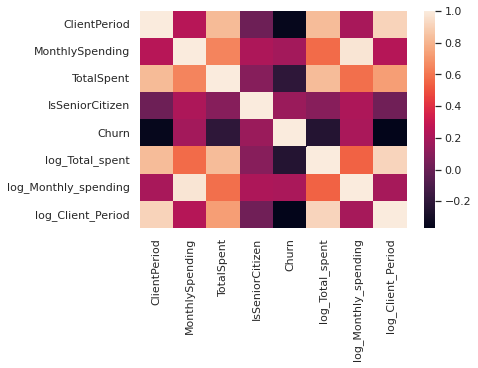

In [38]:
sns.heatmap(data.corr())

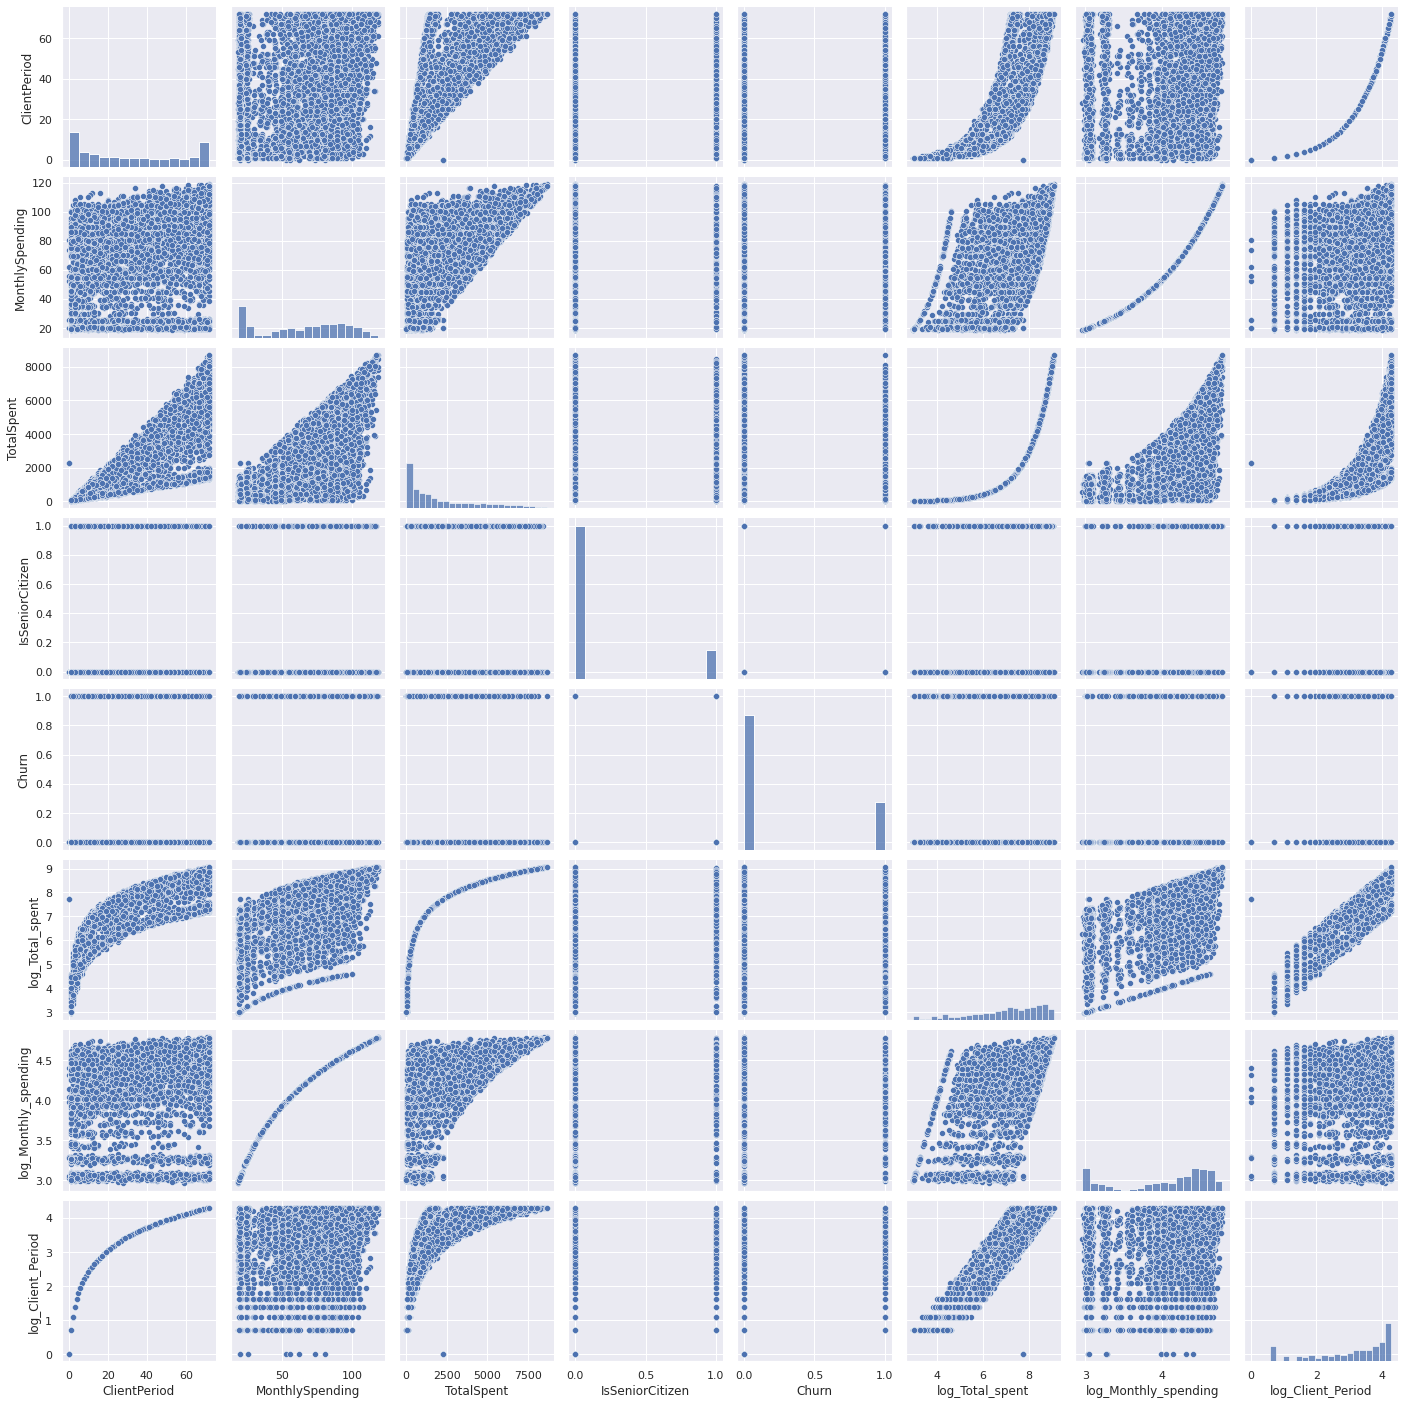

In [39]:
sns.pairplot(data)

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [40]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.33, random_state = 17)

In [41]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score

In [42]:
CB_default = CatBoostClassifier(random_state = 17)
CB_default.fit(X_train, y_train, eval_set=(X_val, y_val),verbose=250)

Learning rate set to 0.043296
0:	learn: 0.6641298	test: 0.6639857	best: 0.6639857 (0)	total: 50.2ms	remaining: 50.1s
250:	learn: 0.3194410	test: 0.4089774	best: 0.4033187 (87)	total: 820ms	remaining: 2.45s
500:	learn: 0.2565787	test: 0.4248497	best: 0.4033187 (87)	total: 1.55s	remaining: 1.55s
750:	learn: 0.2164578	test: 0.4376605	best: 0.4033187 (87)	total: 2.31s	remaining: 765ms
999:	learn: 0.1826663	test: 0.4484437	best: 0.4033187 (87)	total: 3.05s	remaining: 0us

bestTest = 0.4033187056
bestIteration = 87

Shrink model to first 88 iterations.


In [43]:
predict = CB_default.predict_proba(X_val)[:,1]

In [44]:
roc_auc_score(y_val, predict)

0.8435549228892881

Roc_auc_score уже выше 0.84

# Подбор Параметров

In [58]:
CB_par = CatBoostClassifier(
          loss_function='Logloss',
          random_seed = 42,
          eval_metric='AUC',
          verbose=False)

In [59]:
CB_par.grid_search({'l2_leaf_reg': np.linspace(4, 5, 5),
                       'max_depth': [3],
                       'n_estimators': [200, 300, 400],
                       'learning_rate': np.linspace(0.01, 0.2, 10)},
                        X_train,y_train,cv=3,refit=True,
                        verbose=False)


bestTest = 0.8669577615
bestIteration = 179

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.

bestTest = 0.8721943242
bestIteration = 188

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.

bestTest = 0.8722572258
bestIteration = 107

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.

bestTest = 0.8711459633
bestIteration = 72

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.

bestTest = 0.8721052135
bestIteration = 59

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.

bestTest = 0.8716753855
bestIteration = 62

Metric AUC is not calculated on train by default. To calc

{'params': {'depth': 3,
  'iterations': 200,
  'learning_rate': 0.07333333333333333,
  'l2_leaf_reg': 5.0},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,


In [60]:
CB_par.best_score_

{'learn': {'Logloss': 0.3799272101180846}}

In [61]:
best_params = {'depth': 3,
  'iterations': 200,
  'learning_rate': 0.07333333333333333,
  'l2_leaf_reg': 5.0}

In [62]:
CB_best = CatBoostClassifier(**best_params, loss_function = 'Logloss', \
                             eval_metric="AUC", random_state = 17, verbose = 10)

In [63]:
CB_best.fit(X_train, y_train)

0:	total: 1.68ms	remaining: 335ms
10:	total: 17.6ms	remaining: 302ms
20:	total: 29.4ms	remaining: 250ms
30:	total: 40.7ms	remaining: 222ms
40:	total: 51.8ms	remaining: 201ms
50:	total: 65.8ms	remaining: 192ms
60:	total: 77.1ms	remaining: 176ms
70:	total: 88.2ms	remaining: 160ms
80:	total: 99.4ms	remaining: 146ms
90:	total: 111ms	remaining: 133ms
100:	total: 122ms	remaining: 119ms
110:	total: 133ms	remaining: 107ms
120:	total: 145ms	remaining: 94.4ms
130:	total: 156ms	remaining: 82.2ms
140:	total: 167ms	remaining: 70.1ms
150:	total: 179ms	remaining: 58.1ms
160:	total: 190ms	remaining: 46.1ms
170:	total: 205ms	remaining: 34.8ms
180:	total: 223ms	remaining: 23.4ms
190:	total: 234ms	remaining: 11ms
199:	total: 245ms	remaining: 0us


In [64]:
pred_val = CB_best.predict_proba(X_val)[:,1]

In [65]:
roc_auc_score(y_val, pred_val)

0.8425084976942562

# Predictions

In [66]:
X_test = pd.read_csv('https://raw.githubusercontent.com/Viroslav/DLS/main/ML-kaggle/test.csv')

In [67]:
empty = X_test[['TotalSpent']].query('TotalSpent == " "').index  # находим индекс этих строк

for i in empty:                                                # заменяем их на np.nan
  X_test.loc[i, 'TotalSpent'] = np.nan    

X_test[['TotalSpent']] = X_test[['TotalSpent']].astype(float)      # приводим весь столбец к типу float

X_test['TotalSpent'].fillna(np.mean(X_test.TotalSpent), inplace = True)
X_test['TotalSpent'].isna().sum()

0

In [68]:
X_test = X_test.assign(log_Total_spent=np.log(X_test.TotalSpent + 1))
X_test = X_test.assign(log_Monthly_spending=np.log(X_test.MonthlySpending + 1))
X_test = X_test.assign(log_Client_Period=np.log(X_test.ClientPeriod + 1))

In [69]:
cat_feat = pd.get_dummies(X_test[cat_cols])
X_test = pd.concat([X_test[num_cols], cat_feat], axis=1)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

('depth': 3,
  'iterations': 200,
  'learning_rate': 0.073,
  'l2_leaf_reg': 5.0). Roc_auc_score = 0.8425084976942562

# Предсказания

In [70]:
submission = pd.read_csv('https://raw.githubusercontent.com/Viroslav/DLS/main/ML-kaggle/submission.csv')
submission['Churn'] = CB_best.predict_proba(X_test)[:,1]
submission.to_csv('./my_submission.csv', index = False)

Submitted by Viroslav Venski · Submitted just now
Score: 0.84864   (score на Kaggle)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.